Comparison Table of Deep Learning Architectures

| Architecture                 | Parameter Count | Characteristics / Purpose                                  | Advantages                                            | Disadvantages                             | Typical Use Cases                        |
| ---------------------------- | --------------- | ---------------------------------------------------------- | ----------------------------------------------------- | ----------------------------------------- | ---------------------------------------- |
| **ResNet-18/50/101**         | 11M–44M+        | Deep layers with skip connections for easier training      | Stable, high accuracy, great for transfer learning    | Deeper versions require more resources    | Medical imaging, general classification  |
| **VGG-16/19**                | 138M+           | Simple, sequential CNN architecture                        | Easy to understand, good transfer performance         | Very large, computationally heavy         | Educational examples, classic benchmarks |
| **MobileNetV2/V3**           | 2–5M            | Optimized for mobile/embedded devices                      | Very fast, lightweight, low resource requirement      | May have lower accuracy on large datasets | Mobile apps, edge AI                     |
| **EfficientNet-B0/B7**       | 5M–66M          | Scalable CNN architecture balancing parameters and FLOPs   | SOTA accuracy with efficiency                         | B7 variant can be heavy                   | General classification, medical imaging  |
| **DenseNet-121/201**         | 8M–20M          | Each layer connects to all previous layers (feature reuse) | High accuracy with fewer parameters                   | Computationally complex                   | Medical images, small datasets           |
| **InceptionV3**              | \~24M           | Multi-branch filters to capture various spatial details    | Captures complex structures well, good generalization | Complex codebase, harder to tune          | Complex image classification             |
| **SqueezeNet**               | \~1.2M          | Parameter minimization architecture                        | Extremely lightweight, ideal for embedded systems     | Lower accuracy compared to others         | IoT, real-time applications              |
| **ViT (Vision Transformer)** | 86M+            | Patch-based self-attention instead of CNN                  | High accuracy through visual attention mechanisms     | Requires large data and compute resources | Large-scale datasets, research purposes  |
| **ConvNeXt**                 | 29M–89M         | Transformer-inspired modern CNN                            | SOTA performance, clean architecture                  | May require modern GPUs                   | Vision benchmarks, academic projects     |

Due to computational efficiency and resource constraints, I will begin with lightweight architectures such as **MobileNetV2** and **EfficientNet-B0**, which offer a good balance between accuracy and performance. These models are particularly well-suited for environments with limited hardware capabilities.

If these initial models fail to deliver satisfactory results, I will transition to more expressive architectures like **ResNet-18** or **ResNet-50**, where I will apply similar transfer learning strategies and focus on **hyperparameter tuning** to optimize performance.

Should the results still fall short of clinical reliability, I will consider **improving the dataset itself** by:

* Increasing the quantity of high-quality labeled images,
* Enhancing image diversity across different classes and years,
* Applying domain-specific preprocessing techniques to reduce noise and artifacts.

This adaptive approach ensures a balance between computational feasibility and model robustness.




In [ ]:
# Importing the base libraries at the beginnig
import os
import numpy as np
from google.colab import drive
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing import image
import random
import seaborn as sns
#########################
# GPU CONTROL
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Sun May 25 13:51:58 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off |   00000000:00:04.0 Off |                    0 |
| N/A   30C    P0             45W /  400W |       0MiB /  40960MiB |      0%      Default |
|                                         |                        |             Disabled |
+-----------------------------------------+-----

In [ ]:
# Check if Google Drive is mounted
if not os.path.exists('/content/drive'): #
    from google.colab import drive
    drive.mount('/content/drive')

# Define the path to the image dataset
dataset_path = '/content/drive/My Drive/melonoma_classification_dataset/'

# Check if the dataset path exists
if not os.path.exists(dataset_path):
    print(f"Dataset directory not found at: {dataset_path}")
else:
    # List the contents of the directory
    print(f"Contents of {dataset_path}:")
    for item in os.listdir(dataset_path):
        print(item)

    # Count the number of items (files/directories) in the directory
    item_count = len(os.listdir(dataset_path))
    print(f"\nTotal number of items in the directory: {item_count}")

    # Function to count image files in a directory
    def count_images(directory):
        image_count = 0
        for root, _, files in os.walk(directory):
            for file in files:
                # Check if the file has a common image extension
                if file.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp', '.tiff')):
                    image_count += 1
        return image_count

    # Count the total number of image files in the dataset directory and its subdirectories
    total_image_count = count_images(dataset_path)
    print(f"Total number of image files in the dataset: {total_image_count}")

Mounted at /content/drive
Contents of /content/drive/My Drive/melonoma_classification_dataset/:
train
validation
test

Total number of items in the directory: 3
Total number of image files in the dataset: 11740


Found 7953 images belonging to 2 classes.
Found 1897 images belonging to 2 classes.
Found 1890 images belonging to 2 classes.
Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


249/249 ━━━━━━━━━━━━━━━━━━━━ 170s 575ms/step - accuracy: 0.5849 - loss: 0.6681 - val_accuracy: 0.8434 - val_loss: 0.4336
Epoch 2/30
249/249 ━━━━━━━━━━━━━━━━━━━━ 25s 102ms/step - accuracy: 0.8097 - loss: 0.4506 - val_accuracy: 0.8582 - val_loss: 0.3433
Epoch 3/30
249/249 ━━━━━━━━━━━━━━━━━━━━ 24s 97ms/step - accuracy: 0.8452 - loss: 0.3788 - val_accuracy: 0.8666 - val_loss: 0.3074
Epoch 4/30
249/249 ━━━━━━━━━━━━━━━━━━━━ 25s 101ms/step - accuracy: 0.8517 - loss: 0.3365 - val_accuracy: 0.8735 - val_loss: 0.2856
Epoch 5/30
249/249 ━━━━━━━━━━━━━━━━━━━━ 25s 100ms/step - accuracy: 0.8656 - loss: 0.3124 - val_accuracy: 0.8840 - val_loss: 0.2700
Epoch 6/30
249/249 ━━━━━━━━━━━━━━━━━━━━ 25s 99ms/step - accuracy: 0.8666 - loss: 0.3009 - val_accuracy: 0.8904 - val_loss: 0.2568
Epoch 7/30
249/249 ━━━━━━━━━━━━━━━━━━━━ 25s 99ms/step - accuracy: 0.8769 - loss: 0.2908 - val_accuracy: 0.8935 - val_loss: 0.2480
Epoch 8/30
249/249 ━━━━━━━━━━━━━━━━━━━━ 24s 95ms/step - accuracy: 0.8883 - loss: 0.2720 - val_ac

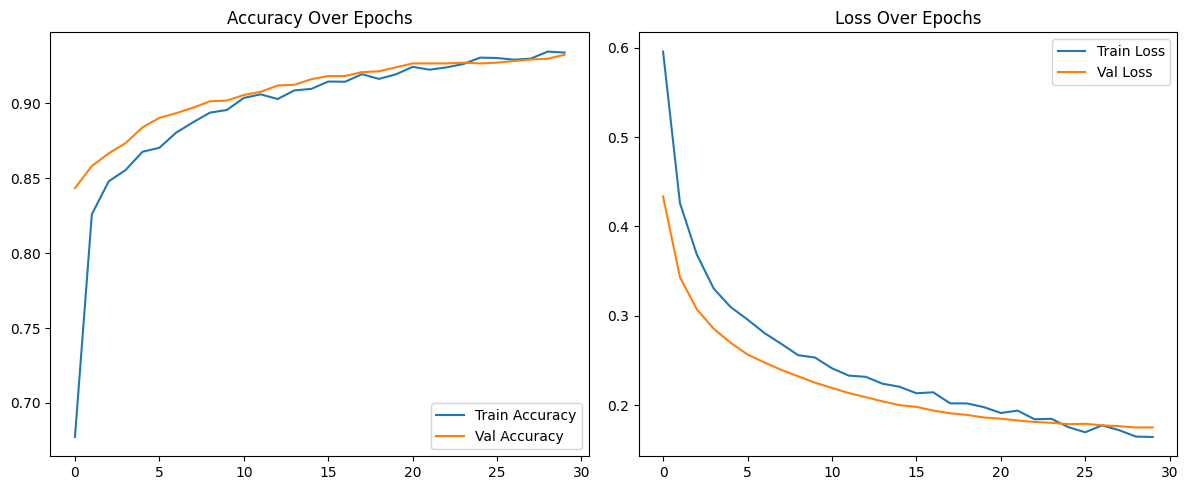

In [ ]:
# Dataset Dir
base_dir = "/content/drive/My Drive/melonoma_classification_dataset"
train_dir = os.path.join(base_dir, "train")
val_dir = os.path.join(base_dir, "validation")
test_dir = os.path.join(base_dir, "test")

train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

val_test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)
val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)
test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

# Calculating the weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.array([0, 1]),
    y=train_generator.classes
)
class_weights = dict(enumerate(class_weights))

# Defining base model
base_model = EfficientNetB0(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
base_model.trainable = True
for layer in base_model.layers[:-30]:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.4)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5), loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks : Important note => It is not necessary it creates latency
callbacks = [
    EarlyStopping(patience=7, restore_best_weights=True),
    ModelCheckpoint("efficientnetb0_melanoma_best.keras", save_best_only=True)
]

# Starting to train
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=30,
    #callbacks=callbacks, # This will lead a huge latenct do not uncomment it! :
    class_weight=class_weights
)

loss, acc = model.evaluate(test_generator)
print(f"Test Accuracy: {acc * 100:.2f}%")

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Accuracy')
plt.plot(epochs_range, val_acc, label='Val Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy Over Epochs')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Loss')
plt.plot(epochs_range, val_loss, label='Val Loss')
plt.legend(loc='upper right')
plt.title('Loss Over Epochs')

plt.tight_layout()
plt.show()



Generating predictions for test set...
60/60 ━━━━━━━━━━━━━━━━━━━━ 16s 169ms/step
Sınıf İsimleri: {'benign': 0, 'malignant': 1}

Classification Report:
              precision    recall  f1-score   support

      benign       0.92      0.95      0.94       948
   malignant       0.95      0.92      0.93       942

    accuracy                           0.93      1890
   macro avg       0.94      0.93      0.93      1890
weighted avg       0.94      0.93      0.93      1890


Confusion Matrix:
[[899  49]
 [ 74 868]]


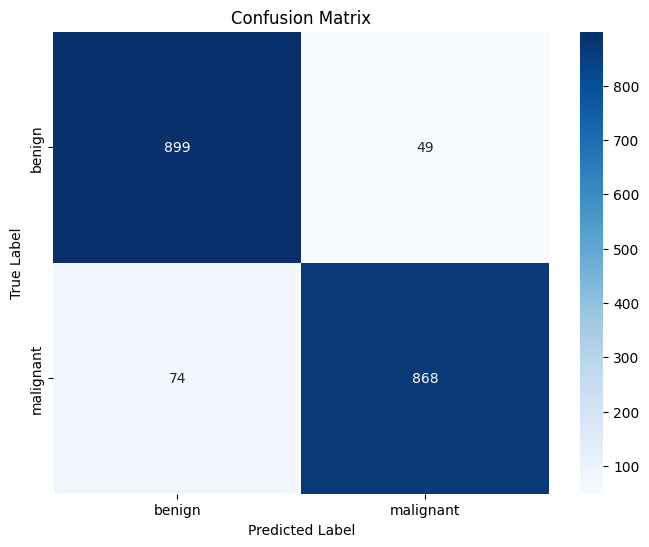


Testing on some random sample images from the test set...
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


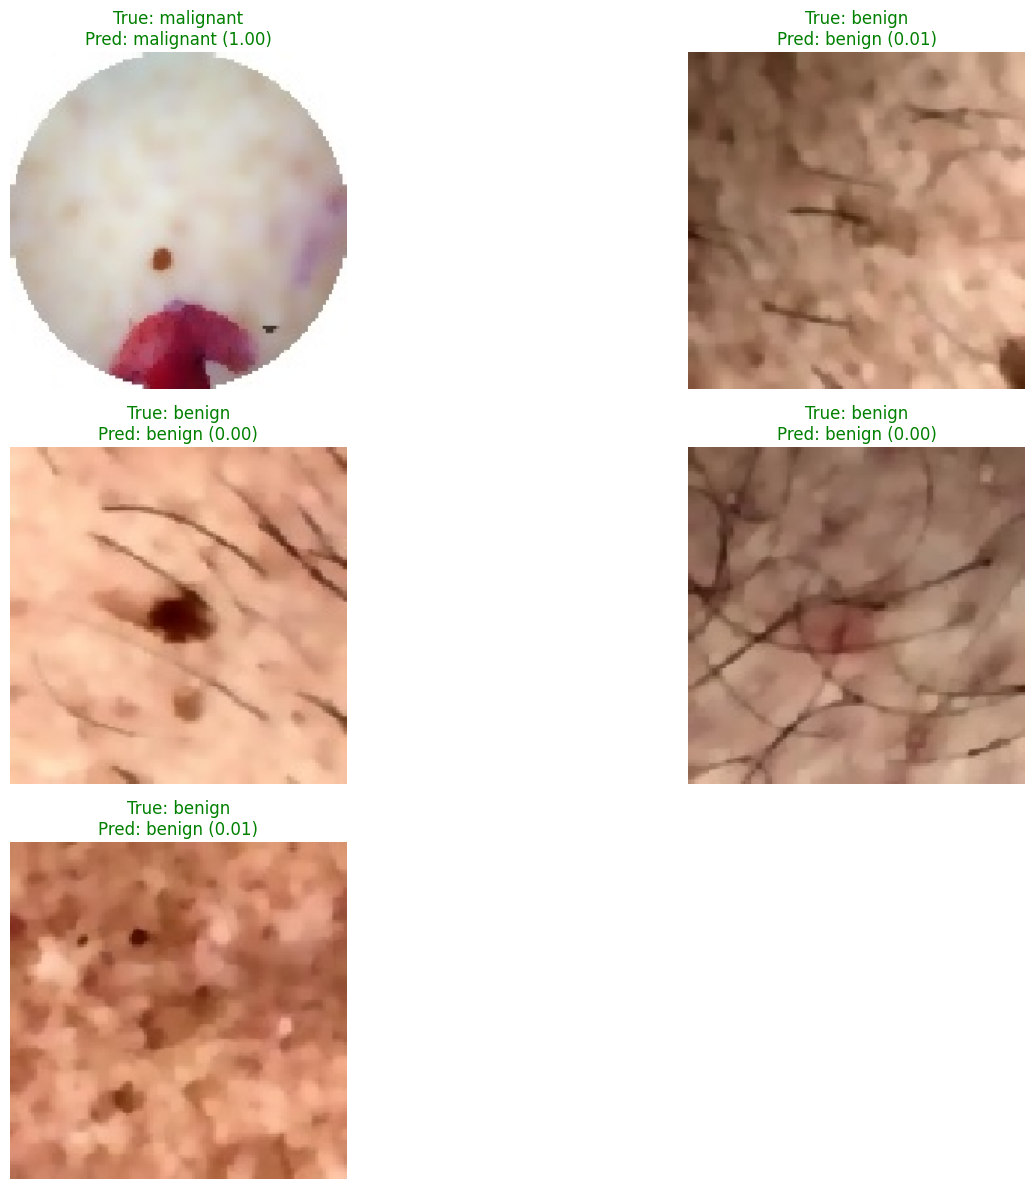


Detailed metrics and sample predictions displayed.


In [ ]:

print("\nGenerating predictions for test set...")
# Resetting the test generator for precaution
test_generator.reset()
# Getting predictions
y_pred_probs = model.predict(test_generator, steps=test_generator.samples // test_generator.batch_size + 1)
# labeling via binary
y_pred_classes = (y_pred_probs > 0.5).astype("int32")

# Real labels
y_true = test_generator.classes

# Class names
class_names = list(test_generator.class_indices.keys())
print(f"Sınıf İsimleri: {test_generator.class_indices}")

# 1. Prediction Report
print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes, target_names=class_names))

# 2. Confusion matrxi for the visual data
print("\nConfusion Matrix:")
cm = confusion_matrix(y_true, y_pred_classes)
print(cm)

# 3. Plotting
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

print("\nTesting on some random sample images from the test set...")

# Images that will shown on ipythondisplay
num_sample_images = 5
if len(test_generator.filenames) < num_sample_images:
    num_sample_images = len(test_generator.filenames)

# Rastgele örnek imaj indeksleri seç
sample_indices = random.sample(range(len(test_generator.filenames)), num_sample_images)

plt.figure(figsize=(15, 5 * num_sample_images // 2 if num_sample_images > 1 else 6))

for i, index in enumerate(sample_indices):
    img_path = os.path.join(test_dir, test_generator.filenames[index])

    # Loading image and making ready
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded = np.expand_dims(img_array, axis=0)
    img_preprocessed = preprocess_input(img_array_expanded)

    # Predict
    prediction_prob = model.predict(img_preprocessed)[0][0]
    predicted_class_index = 1 if prediction_prob > 0.5 else 0
    predicted_class_name = class_names[predicted_class_index]

    true_class_index = test_generator.classes[index]
    true_class_name = class_names[true_class_index]

    # Show the image
    plt.subplot(num_sample_images // 2 + num_sample_images % 2, 2, i + 1)
    plt.imshow(img)
    plt.title(f"True: {true_class_name}\nPred: {predicted_class_name} ({prediction_prob:.2f})",
              color=("green" if predicted_class_name == true_class_name else "red"))
    plt.axis('off')

plt.tight_layout()
plt.show()

print("\nDetailed metrics and sample predictions displayed.")


In [ ]:
model_save_path = "/content/drive/My Drive/melonoma_classification_model/efficientnetb0_melanoma_model.keras"
model.save(model_save_path)